In [1]:
ls

sample_data/


In [2]:
pwd

'/content'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [7]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
ls

drive/  sample_data/


In [9]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/fruit-dataset/fruit-dataset/train', class_mode='categorical',batch_size=24)

Found 5444 images belonging to 6 classes.


In [10]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/fruit-dataset/fruit-dataset/test', class_mode='categorical',batch_size=24)

Found 1676 images belonging to 6 classes.


In [11]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [12]:
model=Sequential()

In [13]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten()) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [15]:
32*(3*3*3+1) 
model.add(Dense(300,activation='relu')) 
model.add(Dense(150,activation='relu'))

In [16]:
model.add(Dense(6,activation='softmax')) 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
len(x_train)

227

In [17]:
1238/24

51.583333333333336

In [ ]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

In [22]:
model.save('fruitdata.h5')

In [23]:
import numpy as np 
from tensorflow.keras.models import load_model 
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('fruitdata.h5')

In [25]:
img=image.load_img('/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/fruit-dataset/fruit-dataset/train/Corn_(maize)___Northern_Leaf_Blight/019e3ef7-aae4-4fd3-b95f-b4e914df7a39___RS_NLB 4284.JPG')

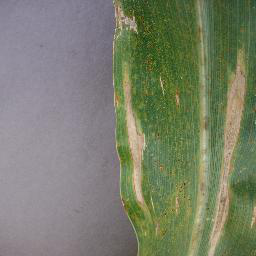

In [26]:
img

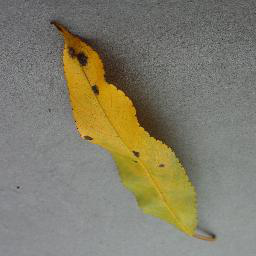

In [27]:
img=image.load_img('/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/fruit-dataset/fruit-dataset/train/Peach___Bacterial_spot/025fdbf8-0339-4821-b788-d2a92b974d31___Rutg._Bact.S 2047.JPG') 
img

In [28]:
x=image.img_to_array(img)

In [29]:
x

array([[[109., 109., 111.],
        [108., 108., 110.],
        [103., 103., 105.],
        ...,
        [103., 103., 101.],
        [107., 107., 105.],
        [ 94.,  94.,  92.]],

       [[104., 104., 106.],
        [105., 105., 107.],
        [103., 103., 105.],
        ...,
        [ 92.,  92.,  90.],
        [103., 103., 101.],
        [ 93.,  93.,  91.]],

       [[101., 101., 103.],
        [105., 105., 107.],
        [106., 106., 108.],
        ...,
        [ 89.,  89.,  87.],
        [103., 103., 101.],
        [101., 101.,  99.]],

       ...,

       [[140., 141., 145.],
        [139., 140., 144.],
        [138., 139., 143.],
        ...,
        [145., 149., 148.],
        [144., 148., 147.],
        [144., 148., 147.]],

       [[139., 140., 144.],
        [138., 139., 143.],
        [138., 139., 143.],
        ...,
        [149., 153., 152.],
        [149., 153., 152.],
        [149., 153., 152.]],

       [[137., 138., 142.],
        [137., 138., 142.],
        [137., 1

In [30]:
x=np.expand_dims(x,axis=0)

In [31]:
x

array([[[[109., 109., 111.],
         [108., 108., 110.],
         [103., 103., 105.],
         ...,
         [103., 103., 101.],
         [107., 107., 105.],
         [ 94.,  94.,  92.]],

        [[104., 104., 106.],
         [105., 105., 107.],
         [103., 103., 105.],
         ...,
         [ 92.,  92.,  90.],
         [103., 103., 101.],
         [ 93.,  93.,  91.]],

        [[101., 101., 103.],
         [105., 105., 107.],
         [106., 106., 108.],
         ...,
         [ 89.,  89.,  87.],
         [103., 103., 101.],
         [101., 101.,  99.]],

        ...,

        [[140., 141., 145.],
         [139., 140., 144.],
         [138., 139., 143.],
         ...,
         [145., 149., 148.],
         [144., 148., 147.],
         [144., 148., 147.]],

        [[139., 140., 144.],
         [138., 139., 143.],
         [138., 139., 143.],
         ...,
         [149., 153., 152.],
         [149., 153., 152.],
         [149., 153., 152.]],

        [[137., 138., 142.],
       

In [ ]:
y=np.argmax(model.predict(x),axis=1)

In [34]:
x_train.class_indices 

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [35]:
index=['Apple__Black_rot','Apple_healthy','Corn(maize)__Northern_Leaf_Blight','Corn(maize)___healthy']

In [ ]:
index[y[0]]

In [ ]:
img=image.load_img('/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___healthy/0137d804-551d-4f78-88b4-d603056dd7e7___JR_HL 7719.JPG') 
x=image.img_to_array(img) 
x=np.expand_dims(x,axis=0) 
y=np.argmax(model.predict(x),axis=1) 
index=['Pepper,_bell_Bacterial_spot','Pepper,_bell_healthy','Potato_Early_blight','Potato_Late_blight','Potato_healthy','Tomato_Bacterial_spot','Tomato_Leaf_Mold','Tomato__Septoria_leaf_spot'] 
index[y[0]]